
# **Running Pyspark in Colab**

To run spark in Colab, You need proper setup. Next cell will create required setup for running Spark/PySpark:

In [1]:
# innstall java
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null

# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [3]:

# # Create SparkSession from builder
# import pyspark
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[1]") \
#                     .appName('SparkByExamples.com') \
#                     .getOrCreate()

In [4]:
spark

In [5]:
print(spark.sparkContext)
print("Spark App Name : "+ spark.sparkContext.appName)

<SparkContext master=local[*] appName=pyspark-shell>
Spark App Name : pyspark-shell


In [18]:
# Create SparkContext
from pyspark import SparkContext
sc = SparkContext("local", "ALY6110_App1")
print(sc.appName)


ALY6110_App1


In [8]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [9]:
import pandas as pd

#dataset_raw = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/BostonHousing.csv')
df = spark.read.csv('/gdrive/MyDrive/Colab Notebooks/BostonHousing.csv', sep=',', inferSchema=True, header=True)

In [10]:
# Import necessary libraries
from pyspark.sql.types import StructType, StructField, FloatType, IntegerType
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

schema = StructType([
    StructField("crim", FloatType(), True),
    StructField("zn", FloatType(), True),
    StructField("indus", FloatType(), True),
    StructField("chas", IntegerType(), True),
    StructField("nox", FloatType(), True),
    StructField("rm", FloatType(), True),
    StructField("age", FloatType(), True),
    StructField("dis", FloatType(), True),
    StructField("rad", IntegerType(), True),
    StructField("tax", IntegerType(), True),
    StructField("ptratio", FloatType(), True),
    StructField("b", FloatType(), True),
    StructField("lstat", FloatType(), True),
    StructField("medv", FloatType(), True)
])

rdd = df.rdd

In [11]:
def mapper(row):
    rm_bin = int(row['rm'])
    return (rm_bin, (row['medv'], 1))

def reducer(accum, value):
    medv_sum, count = accum
    medv, one = value
    return (medv_sum + medv, count + 1)

In [12]:
mapped_rdd = rdd.map(mapper)
reduced_rdd = mapped_rdd.reduceByKey(reducer)
average_medv_rdd = reduced_rdd.mapValues(lambda x: x[0] / x[1])
results = average_medv_rdd.collect()
results = sorted(results)

In [13]:
for rm_bin, avg_medv in results:
    print(f"RM Bin: {rm_bin}, Average MEDV: {avg_medv}")

RM Bin: 3, Average MEDV: 25.3
RM Bin: 4, Average MEDV: 16.023076923076925
RM Bin: 5, Average MEDV: 17.487341772151893
RM Bin: 6, Average MEDV: 22.01598513011151
RM Bin: 7, Average MEDV: 36.917647058823526
RM Bin: 8, Average MEDV: 44.2


In [ ]:
bins = [x[0] for x in results]
avg_medv_values = [x[1] for x in results]

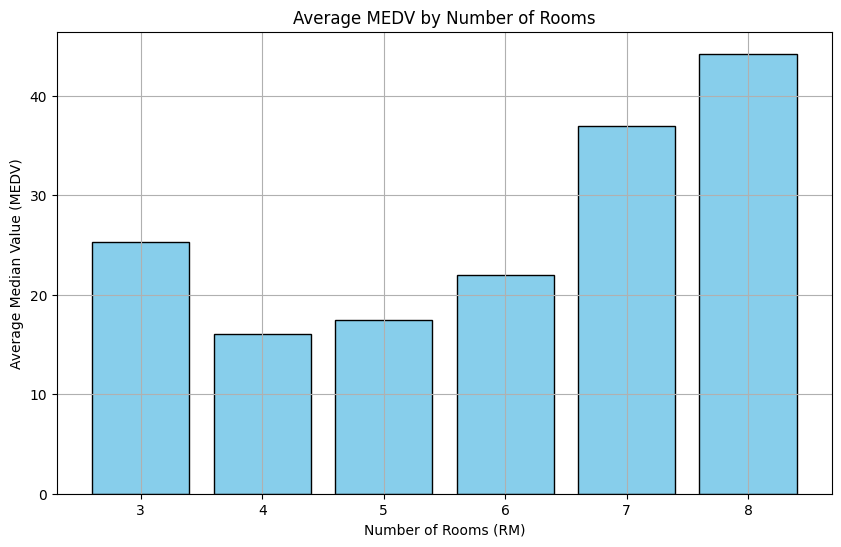

In [ ]:
#chart
plt.figure(figsize=(10, 6))
plt.bar(bins, avg_medv_values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Average Median Value (MEDV)')
plt.title('Average MEDV by Number of Rooms')
plt.xticks(bins)
plt.grid(True)
plt.show()

In [ ]:
sc.stop()

In [17]:
spark.sparkContext.stop()